In [1]:
# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd

In [2]:
# method 2 - Doing Auto ML with PyCaret
!pip install pycaret --upgrade

     |████████████████████████████████| 266kB 3.9MB/s 
     |████████████████████████████████| 1.4MB 22.5MB/s 
     |████████████████████████████████| 1.7MB 37.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 276kB 37.3MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 174kB 44.8MB/s 
     |████████████████████████████████| 6.8MB 34.4MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 14.2MB 279kB/s 
     |████████████████████████████████| 112kB 50.6MB/s 
     |████████████████████████████████| 256kB 49.5MB/s 
     |████████████████████████████████| 2.0MB 33.6MB/s 
     |████████████████████████████████| 1.2MB 31.1MB/s 
     |████████████████████████████████| 153kB 29.1MB/s 
     |████████████████████████████████| 1.1MB 31.5MB

In [3]:
# Assigning the dataset to a variable
df = pd.read_csv('/content/Survival.csv')
# Displaying contents of a dataset
df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [4]:
# Summary statistics for numerical columns
df.describe() 

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [5]:
# Data Structure of the data set
df.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

In [6]:
# Qualitiative Cleaning 
df1 = df # making a copy and retaining original dataset as df

In [7]:
# Data preparation 

# Removing temp department employees 
df1 = df1[df1.Patient_Smoker != 'Cannot say']

In [8]:
df1

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [9]:
# Qualitiative Cleaning
# Selecting only valid variables ignoring noise variables
cols = ['Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond', 'Survived_1_year']

In [10]:
# Setting the dataframe to contain only valid columns
df1 = df1[cols]
df1.columns

Index(['Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [11]:
# Quantitative Cleaning
df1.isnull().sum()

Treated_with_drugs             0
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                           1235
B                           1235
C                           1235
D                           1235
E                           1235
F                           1235
Z                           1235
Number_of_prev_cond         1235
Survived_1_year                0
dtype: int64

In [12]:
# Replacing missing values eg 'filed_complaint' with a hard coded value like zero (eg 1 for yes, 0 for none)
df1['A'] = df1['A'].fillna(0)
df1['B'] = df1['B'].fillna(0)
df1['C'] = df1['C'].fillna(0)
df1['D'] = df1['D'].fillna(0)
df1['E'] = df1['E'].fillna(0)
df1['F'] = df1['F'].fillna(0)
df1['Z'] = df1['Z'].fillna(0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [13]:
# Replacing specific missing values with median 
df1['Number_of_prev_cond'] = df1['Number_of_prev_cond'].fillna((df1['Number_of_prev_cond'].median()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# Display number of missing values by feature after all quantitative and qualititatve cleaning
df1.isnull().sum()

Treated_with_drugs          0
Patient_Age                 0
Patient_Body_Mass_Index     0
Patient_Smoker              0
Patient_Rural_Urban         0
Patient_mental_condition    0
A                           0
B                           0
C                           0
D                           0
E                           0
F                           0
Z                           0
Number_of_prev_cond         0
Survived_1_year             0
dtype: int64

In [15]:
# Setting Categorical columns
#cat_cols = ['Treated_with_drugs','Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition']
cat_cols = ['Treated_with_drugs','Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z']


In [16]:
#To import all Classification related Pycaret libraries
from pycaret.classification import *

In [17]:
# Setting up the classification ML experiment
classification_model_setup = setup(df1,  target = 'Survived_1_year', categorical_features= cat_cols,  train_size = 0.7)

,Description,Value
0,session_id,7820
1,Target,Survived_1_year
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(23084, 15)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
# Running the multiple algorithms
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7995,0.8733,0.8751,0.8217,0.8475,0.5556,0.5580,1.492
lightgbm,Light Gradient Boosting Machine,0.7986,0.8729,0.8605,0.8296,0.8448,0.5584,0.5592,0.268
ada,Ada Boost Classifier,0.7805,0.8531,0.8515,0.8129,0.8317,0.5169,0.5182,0.524
rf,Random Forest Classifier,0.7647,0.8306,0.8395,0.8008,0.8196,0.4818,0.4831,1.736
et,Extra Trees Classifier,0.7482,0.7776,0.8240,0.7898,0.8065,0.4465,0.4475,1.827
lr,Logistic Regression,0.7295,0.7818,0.8601,0.7514,0.8020,0.3815,0.3903,1.621
lda,Linear Discriminant Analysis,0.7294,0.7818,0.8558,0.7531,0.8011,0.3833,0.3911,0.141
ridge,Ridge Classifier,0.7284,0.0000,0.8612,0.7497,0.8016,0.3779,0.3873,0.045
knn,K Neighbors Classifier,0.7281,0.7670,0.7877,0.7858,0.7867,0.4116,0.4117,0.323
dt,Decision Tree Classifier,0.7278,0.7139,0.7741,0.7934,0.7836,0.4168,0.4171,0.095


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7820, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
# Creating the model with the best algorithm based on the above results
model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8168,0.8864,0.8882,0.8347,0.8606,0.5942,0.5967
1,0.7970,0.8740,0.8766,0.8178,0.8462,0.5490,0.5519
2,0.7946,0.8682,0.8766,0.8148,0.8446,0.5428,0.5460
3,0.8001,0.8758,0.8698,0.8256,0.8471,0.5591,0.5606
4,0.7976,0.8744,0.8698,0.8226,0.8455,0.5529,0.5547
5,0.8007,0.8761,0.8795,0.8205,0.8490,0.5573,0.5602
6,0.7939,0.8628,0.8727,0.8164,0.8436,0.5427,0.5453
7,0.8063,0.8749,0.8698,0.8333,0.8512,0.5743,0.5754
8,0.7827,0.8599,0.8630,0.8087,0.8350,0.5177,0.5201
9,0.8050,0.8803,0.8853,0.8222,0.8526,0.5656,0.5689


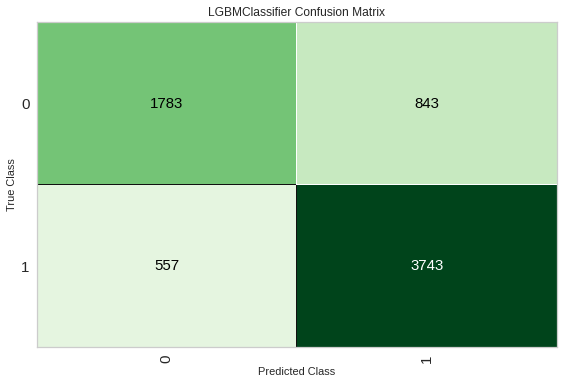

In [20]:
# Plotting the confusion matrix etc metrics based on the model
plot_model(model, plot = 'confusion_matrix')
#evaluate_model(model)